In [2]:
!pip install scapy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444328 sha256=8cdb39d1fc3c66c2d4843b4df6618ed343820872e6578d82f3b38bce8b042edd
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [6]:
from scapy.all import *
from google.colab import files

In [12]:

# Upload 'capture.pcapng' file from local machine to Colab
uploaded = files.upload()
# Check if the file is uploaded
if 'network.pcapng' in uploaded:
    print('File uploaded successfully!')

Saving network.pcapng to network.pcapng
File uploaded successfully!


In [13]:
# Load the uploaded pcapng file
file_path = list(uploaded.keys())[0]  # Get the file path
packets = rdpcap(file_path)

In [14]:
# Analyze Captured Data
# Example: Print summary information of the first 10 packets
print("Summary of the first 10 packets:")
print(packets.summary())


Summary of the first 10 packets:
Ether / IP / UDP 192.168.1.80:51487 > 239.255.255.250:1900 / Raw
Ether / IPv6 / ICMPv6ND_NS / ICMPv6 Neighbor Discovery Option - Source Link-Layer Address 78:3e:a1:b5:38:30
Ether / IPv6 / ICMPv6ND_NA / ICMPv6 Neighbor Discovery Option - Destination Link-Layer Address b4:b5:b6:de:47:4b
Ether / IPv6 / ICMPv6ND_NS / ICMPv6 Neighbor Discovery Option - Source Link-Layer Address 78:3e:a1:b5:38:30
Ether / IPv6 / ICMPv6ND_NA / ICMPv6 Neighbor Discovery Option - Destination Link-Layer Address b4:b5:b6:de:47:4b
Ether / IP / UDP 192.168.1.80:51487 > 239.255.255.250:1900 / Raw
Ether / IP / TCP 3.33.193.183:443 > 192.168.1.73:49826 PA / Raw
Ether / IP / TCP 192.168.1.73:49826 > 3.33.193.183:443 PA / Raw
Ether / IP / TCP 3.33.193.183:443 > 192.168.1.73:49826 A
Ether / IP / UDP 192.168.1.80:51487 > 239.255.255.250:1900 / Raw
Ether / ARP who has 192.168.1.73 says 192.168.1.254 / Padding
Ether / ARP is at b4:b5:b6:de:47:4b says 192.168.1.73
Ether / IPv6 / ICMPv6ND_NS / 

In [15]:
# Example: Extract source and destination IP addresses of TCP packets
tcp_packets = [pkt for pkt in packets if pkt.haslayer(TCP)]
for pkt in tcp_packets[:10]:
    print("Source IP:", pkt[IP].src)
    print("Destination IP:", pkt[IP].dst)

Source IP: 3.33.193.183
Destination IP: 192.168.1.73
Source IP: 192.168.1.73
Destination IP: 3.33.193.183
Source IP: 3.33.193.183
Destination IP: 192.168.1.73
Source IP: 20.65.133.230
Destination IP: 192.168.1.73
Source IP: 192.168.1.73
Destination IP: 20.65.133.230
Source IP: 192.168.1.73
Destination IP: 20.65.133.230
Source IP: 20.65.133.230
Destination IP: 192.168.1.73
Source IP: 20.65.133.230
Destination IP: 192.168.1.73


In [16]:
# Example: Analyze packet sizes
packet_sizes = [len(pkt) for pkt in packets]
print("Minimum Packet Size:", min(packet_sizes))
print("Maximum Packet Size:", max(packet_sizes))
print("Average Packet Size:", sum(packet_sizes) / len(packet_sizes))

Minimum Packet Size: 42
Maximum Packet Size: 216
Average Packet Size: 113.70370370370371


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
# Create an empty directed graph
G = nx.DiGraph()

# Extract source and destination IP addresses from packets
edges = [(pkt[IP].src, pkt[IP].dst) for pkt in packets if IP in pkt]

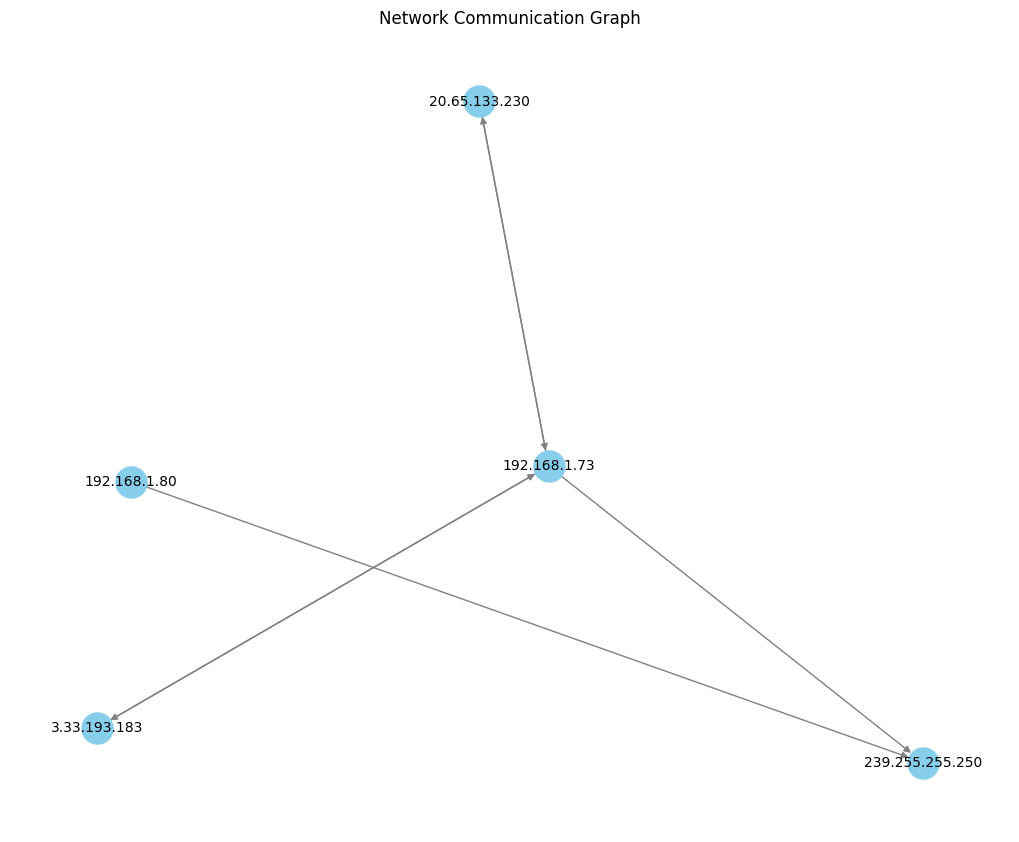

In [19]:
# Add edges to the graph
G.add_edges_from(edges)

# Plot the network graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, edge_color='gray')
plt.title('Network Communication Graph')
plt.show()